In [18]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics

In [19]:
dataset = pd.read_csv('network_backup_dataset.csv')
dataset.columns = ['week', 'day_of_week', 'backup_start_time', 'work_flow_id', 'file_name', 'size_of_backup', 'backup_time']

In [20]:
# replacing values for this dataset for kNN
dataset_new = dataset.replace({'day_of_week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
                                  'Saturday': 6, 'Sunday': 7},
                  'work_flow_id': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'file_name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22,
                                'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 'File_27': 27,
                                'File_28': 28, 'File_29': 29, }})

In [21]:
X_data = dataset_new
y_data = dataset_new.pop('size_of_backup')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [7]:
for i in range(1,5):
    for j in range(20,40):
        knr=KNeighborsRegressor(n_neighbors=i,leaf_size=j,p=1,metric='minkowski',weights='distance')
        knr.fit(X_train,y_train)
        accuracy=cross_val_score(knr,X_train,y_train,cv=10)
        print("Accuarcy using K-nearest neighbor regression using ", i, "neighbors with ", j , "leaves is ",np.mean(accuracy))

Accuarcy using K-nearest neighbor regression using  1 neighbors with  20 leaves is  0.950618828162
Accuarcy using K-nearest neighbor regression using  1 neighbors with  21 leaves is  0.950618828162
Accuarcy using K-nearest neighbor regression using  1 neighbors with  22 leaves is  0.950618828162
Accuarcy using K-nearest neighbor regression using  1 neighbors with  23 leaves is  0.950618828162
Accuarcy using K-nearest neighbor regression using  1 neighbors with  24 leaves is  0.950618828162
Accuarcy using K-nearest neighbor regression using  1 neighbors with  25 leaves is  0.950618828162
Accuarcy using K-nearest neighbor regression using  1 neighbors with  26 leaves is  0.950618828162
Accuarcy using K-nearest neighbor regression using  1 neighbors with  27 leaves is  0.950618828162
Accuarcy using K-nearest neighbor regression using  1 neighbors with  28 leaves is  0.950618828162
Accuarcy using K-nearest neighbor regression using  1 neighbors with  29 leaves is  0.950618828162
Accuarcy u

<p> Max accuracy is received with 4 neighbors and 20 leaves from the data collected above. </p>

In [23]:
def calculate_RMSE(predicted, actual):  
    return np.sqrt(np.mean((predicted - actual) ** 2))  

Test RMSE for this model is : 0.0350843325043
Train RMSE for this model is: 0.0168447691283
RMSE for this model is : 0.0143662705217


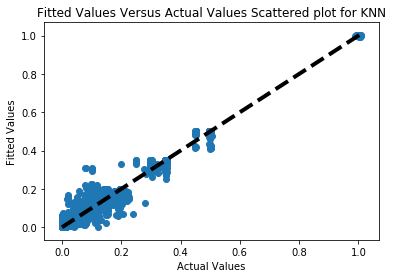

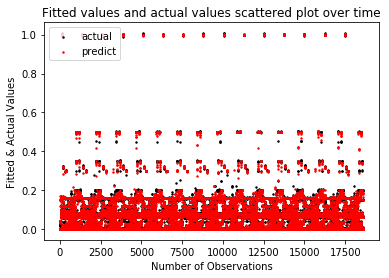

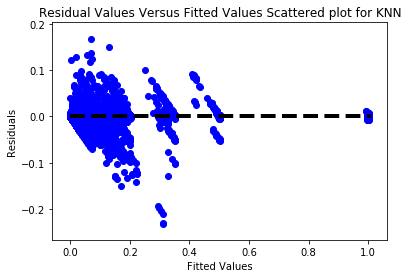

In [24]:
# Time to compute the RMSE score

knr=KNeighborsRegressor(n_neighbors=4,leaf_size=20,p=1,metric='minkowski',weights='distance')
knr.fit(X_train,y_train)
predicted_test_value = cross_val_predict(knr, X_test, y_test, cv=10)
predicted_train_value = cross_val_predict(knr, X_train, y_train, cv=10)

print ("Test RMSE for this model is : " + str(calculate_RMSE(predicted_test_value, y_test)))
print("Train RMSE for this model is: " + str(calculate_RMSE(predicted_train_value, y_train)))


# fitting the whole dataset
knr = KNeighborsRegressor(n_neighbors=4,leaf_size=20,p=1,metric='minkowski',weights='distance')
knr.fit(X_data,y_data)
predicted_data_value = cross_val_predict(knr, X_data, y_data, cv=10)
print ("RMSE for this model is : " + str(calculate_RMSE(predicted_data_value, y_data)))

plt.title('Fitted Values Versus Actual Values Scattered plot for KNN')
plt.scatter(y_data, predicted_data_value)
plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.figure()
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y_data.shape[0]), y_data, color='black', label='actual', s=2)
plt.scatter(np.arange(y_data.shape[0]), predicted_data_value, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()


plt.title('Residual Values Versus Fitted Values Scattered plot for KNN')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predicted_data_value,y_data-predicted_data_value,  color='blue', lw=1, label='residual')
plt.plot([y_data.min(), y_data.max()], [0, 0], 'k--', lw=4)
plt.show()    

<p> As can be seen, Test RMSE is 0.035 and Train RMSE is 0.016. The RMSE for the whole dataset is 0.014 </p>

## One hot encoding

In [25]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [26]:
dataset = pd.read_csv('network_backup_dataset.csv')
dataset.columns = ['week', 'day_of_week', 'backup_start_time', 'work_flow_id', 'file_name', 'size_of_backup', 'backup_time']
dataset_revised = one_hot(dataset, ['day_of_week', 'backup_start_time', 'work_flow_id', 'file_name'])
dataset_revised.drop('day_of_week', 1, inplace=True)
dataset_revised.drop('backup_start_time', 1, inplace=True)
dataset_revised.drop('work_flow_id',1,inplace=True)
dataset_revised.drop('file_name',1,inplace=True)
dataset_revised.drop('week',1,inplace=True)

In [27]:
X_data = dataset_revised
y_data = dataset_revised.pop('size_of_backup')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [7]:
for i in range(1,5):
    for j in range(20,40):
        knr=KNeighborsRegressor(n_neighbors=i,leaf_size=j,p=1,metric='minkowski',weights='distance')
        knr.fit(X_train,y_train)
        accuracy=cross_val_score(knr,X_train,y_train,cv=10)
        print("Accuarcy using K-nearest neighbor regression using ", i, "neighbors with ", j , "leaves is ",np.mean(accuracy))

Accuarcy using K-nearest neighbor regression using  1 neighbors with  20 leaves is  0.983863694259
Accuarcy using K-nearest neighbor regression using  1 neighbors with  21 leaves is  0.983863694259
Accuarcy using K-nearest neighbor regression using  1 neighbors with  22 leaves is  0.983863694259
Accuarcy using K-nearest neighbor regression using  1 neighbors with  23 leaves is  0.983863694259
Accuarcy using K-nearest neighbor regression using  1 neighbors with  24 leaves is  0.983863694259
Accuarcy using K-nearest neighbor regression using  1 neighbors with  25 leaves is  0.983863694259
Accuarcy using K-nearest neighbor regression using  1 neighbors with  26 leaves is  0.983863694259
Accuarcy using K-nearest neighbor regression using  1 neighbors with  27 leaves is  0.983863694259
Accuarcy using K-nearest neighbor regression using  1 neighbors with  28 leaves is  0.983863694259
Accuarcy using K-nearest neighbor regression using  1 neighbors with  29 leaves is  0.983863694259
Accuarcy u

#### Best result is 4 neighbors, 30 leaves

In [29]:
def calculate_RMSE(predicted, actual):  
    return np.sqrt(np.mean((predicted - actual) ** 2))  

Test RMSE for this model is : 0.0192658415277
Train RMSE for this model is: 0.0107282147009
RMSE for this model is : 0.0105486267844


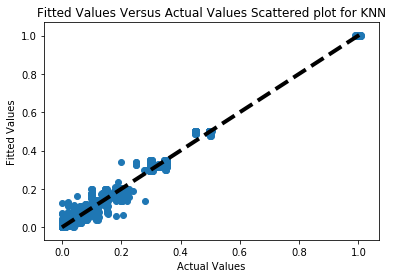

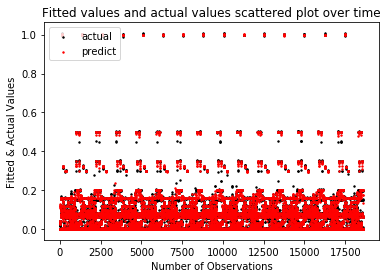

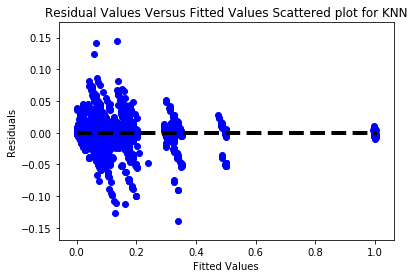

In [30]:
# Time to compute the RMSE score

knr=KNeighborsRegressor(n_neighbors=4,leaf_size=30,p=1,metric='minkowski',weights='distance')
knr.fit(X_train,y_train)
predicted_test_value = cross_val_predict(knr, X_test, y_test, cv=10)
predicted_train_value = cross_val_predict(knr, X_train, y_train, cv=10)

print ("Test RMSE for this model is : " + str(calculate_RMSE(predicted_test_value, y_test)))
print("Train RMSE for this model is: " + str(calculate_RMSE(predicted_train_value, y_train)))


# fitting the whole dataset
knr = KNeighborsRegressor(n_neighbors=4,leaf_size=30,p=1,metric='minkowski',weights='distance')
knr.fit(X_data,y_data)
predicted_data_value = cross_val_predict(knr, X_data, y_data, cv=10)
print ("RMSE for this model is : " + str(calculate_RMSE(predicted_data_value, y_data)))

plt.title('Fitted Values Versus Actual Values Scattered plot for KNN')
plt.scatter(y_data, predicted_data_value)
plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.figure()
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y_data.shape[0]), y_data, color='black', label='actual', s=2)
plt.scatter(np.arange(y_data.shape[0]), predicted_data_value, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()


plt.title('Residual Values Versus Fitted Values Scattered plot for KNN')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predicted_data_value,y_data-predicted_data_value,  color='blue', lw=1, label='residual')
plt.plot([y_data.min(), y_data.max()], [0, 0], 'k--', lw=4)
plt.show()    

<p> As can be seen, Test RMSE is 0.019 and Train RMSE is 0.0107. The RMSE for the whole dataset is 0.0105 </p>